In [300]:
import yfinance as yf
import pandas as pd
import numpy as np
import requests
import time
import random
import string
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

pd.set_option("display.max_columns", 50)

In [2]:
snp500=pd.read_csv('./ticker.csv')

In [3]:
snp500

,Ticker
0,ZTS
1,ZION
2,ZBRA
3,ZBH
4,YUM
...,...
499,ABC
500,ABBV
501,AAPL
502,AAP


In [4]:
snp=pd.DataFrame()
stock_num=1
for ticker in snp500['Ticker']:
    data = yf.download(ticker, group_by="Ticker", period='max')
    data['ticker'] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
    print(f'{stock_num} {ticker}')
    stock_num+=1
    snp=snp.append(data)
    snp.to_csv('./stock_price/snp.csv')

[*********************100%***********************]  1 of 1 completed
1 ZTS
[*********************100%***********************]  1 of 1 completed
2 ZION
[*********************100%***********************]  1 of 1 completed
3 ZBRA
[*********************100%***********************]  1 of 1 completed
4 ZBH
[*********************100%***********************]  1 of 1 completed
5 YUM
[*********************100%***********************]  1 of 1 completed
6 XYL
[*********************100%***********************]  1 of 1 completed
7 XRAY
[*********************100%***********************]  1 of 1 completed
8 XOM
[*********************100%***********************]  1 of 1 completed
9 XLNX
[*********************100%***********************]  1 of 1 completed
10 XEL
[*********************100%***********************]  1 of 1 completed
11 WYNN
[*********************100%***********************]  1 of 1 completed
12 WY
[*********************100%***********************]  1 of 1 completed
13 WU
[*****************

[*********************100%***********************]  1 of 1 completed
214 MA
[*********************100%***********************]  1 of 1 completed
215 LYV
[*********************100%***********************]  1 of 1 completed
216 LYB
[*********************100%***********************]  1 of 1 completed
217 LW
[*********************100%***********************]  1 of 1 completed
218 LVS
[*********************100%***********************]  1 of 1 completed
219 LUV
[*********************100%***********************]  1 of 1 completed
220 LUMN
[*********************100%***********************]  1 of 1 completed
221 LRCX
[*********************100%***********************]  1 of 1 completed
222 LOW
[*********************100%***********************]  1 of 1 completed
223 LNT
[*********************100%***********************]  1 of 1 completed
224 LNC
[*********************100%***********************]  1 of 1 completed
225 LMT
[*********************100%***********************]  1 of 1 completed
226 LLY

[*********************100%***********************]  1 of 1 completed
426 CB
[*********************100%***********************]  1 of 1 completed
427 CAT
[*********************100%***********************]  1 of 1 completed
428 CARR
[*********************100%***********************]  1 of 1 completed
429 CAH
[*********************100%***********************]  1 of 1 completed
430 CAG
[*********************100%***********************]  1 of 1 completed
431 C
[*********************100%***********************]  1 of 1 completed
432 BXP
[*********************100%***********************]  1 of 1 completed
433 BWA
[*********************100%***********************]  1 of 1 completed
434 BSX
[*********************100%***********************]  1 of 1 completed
435 BRK-B
[*********************100%***********************]  1 of 1 completed
436 BR
[*********************100%***********************]  1 of 1 completed
437 BMY
[*********************100%***********************]  1 of 1 completed
438 BLL


In [11]:
ticker='AAPL'
url='https://finviz.com/quote.ashx?t='+ticker

In [12]:
res=requests.get(url,headers={'User-agent':'Mengchin1.0'})

In [13]:
res.status_code

200

In [14]:
soup = BeautifulSoup(res.content,'lxml')

In [15]:
soup

<!DOCTYPE html>
<html>
<head>
<title>AAPL Apple Inc. Stock Quote</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=1024" name="viewport"/><meta content="Stock screener for investors and traders, financial visualizations." name="description"/>
<meta content="Stock Screener, Charts, Quotes, Maps, News, Financial Visualizations, Research, Trading Systems" name="keywords"/>
<meta content="no" http-equiv="imagetoolbar"/>
<meta content="no-cache" http-equiv="pragma"/>
<meta content="no-cache" http-equiv="cache-control"/>
<meta content="-1" http-equiv="Expires"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-regular.woff2" rel="preload"/>
<link as="font" crossorigin="" href="/fonts/lato-v17-latin-ext_latin-700.woff2" rel="preload"/>
<link href="/assets/dist/finviz.89b7b09c.css" rel="stylesheet" type="text/css"/>
<link href="/favicon_2x.png" rel="icon" sizes="32x32" type="image/png"/>
<link href="/favicon.png" rel="icon" sizes="16x16" ty

In [16]:
soup.find_all('a',attrs={'class':'tab-link'})

[<a class="tab-link" href="javascript:void(0)" id="publish-chart">publish chart</a>,
 <a class="tab-link" href="/save_to_portfolio.ashx?t=AAPL">save to portfolio</a>,
 <a class="tab-link" href="/create_alert.ashx?t=AAPL">create alert</a>,
 <a class="tab-link" href="quote.ashx?t=AAPL&amp;ty=c&amp;ta=0&amp;p=d">candle</a>,
 <a class="tab-link" href="quote.ashx?t=AAPL&amp;ty=l&amp;ta=0&amp;p=d">line</a>,
 <a class="tab-link" href="quote.ashx?t=AAPL&amp;ty=c&amp;ta=1&amp;p=d"><b>advanced</b></a>,
 <a class="tab-link" href="/elite.ashx">interactive</a>,
 <a class="tab-link" href="/elite.ashx">perf</a>,
 <a class="tab-link" href="elite.ashx">intraday</a>,
 <a class="tab-link" href="quote.ashx?t=AAPL&amp;ty=c&amp;ta=1&amp;p=d"><b>daily</b></a>,
 <a class="tab-link" href="quote.ashx?t=AAPL&amp;ty=c&amp;ta=0&amp;p=w">weekly</a>,
 <a class="tab-link" href="quote.ashx?t=AAPL&amp;ty=c&amp;ta=0&amp;p=m">monthly</a>,
 <a class="tab-link" href="http://www.apple.com" target="_blank"><b>Apple Inc.</b><

In [17]:
fundamental=pd.DataFrame({
    'ticker':['AAPL'],
    'sector':[soup.find_all('a',attrs={'class':'tab-link'})[13].text]})

In [18]:
fundamental=pd.DataFrame(fundamental)

In [19]:
for title, value in zip(soup.find_all('td',attrs={'class':'snapshot-td2-cp'}),
                                     soup.find_all('td',attrs={'class':'snapshot-td2'})):
    fundamental[title.text]=value.text

In [20]:
def agent():
    return"".join([(random.choice(string.ascii_uppercase + string.digits)) for i in range(random.randint(10,15))])

In [31]:
fundamental=pd.DataFrame()
for ticker in snp500['Ticker']:
    url='https://finviz.com/quote.ashx?t='+ticker
    res=requests.get(url,headers={'User-agent':agent()})
    if res.status_code == 200:
        soup = BeautifulSoup(res.content,'lxml')
        ticker_f=pd.DataFrame({
            'ticker':[ticker],
            'sector':[soup.find_all('a',attrs={'class':'tab-link'})[13].text]})
        
        for title, value in zip(
            soup.find_all('td',attrs={'class':'snapshot-td2-cp'}),
            soup.find_all('td',attrs={'class':'snapshot-td2'})):
                ticker_f[title.text]=value.text
        
        fundamental=pd.concat([fundamental,ticker_f],axis=0)
        print(f'{ticker} fundamental data obtained successfully')
    
    else:
        print(f'{ticker} get request fail')
    
    sleep_duration = random.randint(5,20)
    print(sleep_duration)
    time.sleep(sleep_duration)

ZTS fundamental data obtained successfully
19
ZION fundamental data obtained successfully
19
ZBRA fundamental data obtained successfully
20
ZBH fundamental data obtained successfully
7
YUM fundamental data obtained successfully
17
XYL fundamental data obtained successfully
12
XRAY fundamental data obtained successfully
5
XOM fundamental data obtained successfully
17
XLNX fundamental data obtained successfully
13
XEL fundamental data obtained successfully
20
WYNN fundamental data obtained successfully
11
WY fundamental data obtained successfully
19
WU fundamental data obtained successfully
10
WST fundamental data obtained successfully
10
WRK fundamental data obtained successfully
7
WRB fundamental data obtained successfully
18
WMT fundamental data obtained successfully
18
WMB fundamental data obtained successfully
6
WM fundamental data obtained successfully
16
WLTW fundamental data obtained successfully
12
WHR fundamental data obtained successfully
12
WFC fundamental data obtained succe

NDAQ fundamental data obtained successfully
6
NCLH fundamental data obtained successfully
8
MXIM fundamental data obtained successfully
19
MU fundamental data obtained successfully
12
MTD fundamental data obtained successfully
15
MTB fundamental data obtained successfully
13
MSI fundamental data obtained successfully
12
MSFT fundamental data obtained successfully
12
MSCI fundamental data obtained successfully
8
MS fundamental data obtained successfully
5
MRO fundamental data obtained successfully
15
MRK fundamental data obtained successfully
17
MPWR fundamental data obtained successfully
12
MPC fundamental data obtained successfully
18
MOS fundamental data obtained successfully
13
MO fundamental data obtained successfully
9
MNST fundamental data obtained successfully
13
MMM fundamental data obtained successfully
14
MMC fundamental data obtained successfully
14
MLM fundamental data obtained successfully
6
MKTX fundamental data obtained successfully
17
MKC fundamental data obtained succe

DVA fundamental data obtained successfully
7
DUK fundamental data obtained successfully
14
DTE fundamental data obtained successfully
6
DRI fundamental data obtained successfully
19
DRE fundamental data obtained successfully
14
DPZ fundamental data obtained successfully
9
DOW fundamental data obtained successfully
17
DOV fundamental data obtained successfully
20
DLTR fundamental data obtained successfully
6
DLR fundamental data obtained successfully
5
DISH fundamental data obtained successfully
14
DISCK fundamental data obtained successfully
19
DISCA fundamental data obtained successfully
19
DIS fundamental data obtained successfully
19
DHR fundamental data obtained successfully
12
DHI fundamental data obtained successfully
18
DGX fundamental data obtained successfully
17
DG fundamental data obtained successfully
19
DFS fundamental data obtained successfully
20
DE fundamental data obtained successfully
16
DD fundamental data obtained successfully
18
DAL fundamental data obtained succes

In [44]:
fundamental.to_csv('./stock_price/fundamental.csv',index=False)

In [239]:
stock_fund=pd.read_csv('./stock_price/fundamental.csv')

In [240]:
stock_fund.head()

,ticker,sector,Index,P/E,EPS (ttm),Insider Own,Shs Outstand,Perf Week,Market Cap,Forward P/E,EPS next Y,Insider Trans,Shs Float,Perf Month,Income,PEG,EPS next Q,Inst Own,Short Float,Perf Quarter,Sales,P/S,EPS this Y,Inst Trans,Short Ratio,...,ATR,Employees,Current Ratio,Sales Q/Q,Oper. Margin,RSI (14),Volatility,Optionable,Debt/Eq,EPS Q/Q,Profit Margin,Rel Volume,Prev Close,Shortable,LT Debt/Eq,Earnings,Payout,Avg Volume,Price,Recom,SMA20,SMA50,SMA200,Volume,Change
0,ZTS,Healthcare,S&P 500,49.39,3.42,0.10%,475.51M,2.19%,79.27B,34.11,12.18%,-39.81%,474.33M,8.35%,1.64B,4.32,1.03,93.50%,0.99%,2.80%,6.67B,11.88,9.90%,-0.98%,2.22,...,2.83,11300,3.00,7.90%,29.90%,69.43,1.27% 1.63%,Yes,1.91,-7.40%,24.50%,0.69,170.15,Yes,1.75,May 06 BMO,23.20%,2.11M,169.07,1.90,5.13%,6.87%,6.42%,"1,466,014",-0.63%
1,ZION,Financial,S&P 500,17.27,3.04,1.20%,163.66M,-5.83%,8.55B,12.28,-4.40%,-11.85%,161.54M,-1.91%,500.00M,-,1.16,86.30%,1.66%,10.90%,2.37B,3.61,-27.30%,-2.19%,1.86,...,1.89,9678,-,-11.70%,76.10%,41.37,3.64% 3.01%,Yes,0.18,73.50%,21.10%,1.01,53.65,Yes,0.18,Apr 19 AMC,44.50%,1.45M,52.56,2.70,-4.73%,-3.80%,27.45%,"1,461,514",-2.04%
2,ZBRA,Technology,S&P 500,52.07,9.36,0.70%,53.38M,-4.04%,25.79B,28.45,10.35%,-26.18%,52.87M,5.34%,504.00M,5.21,4.39,88.50%,0.93%,19.98%,4.45B,5.80,-7.20%,-1.92%,1.35,...,11.74,8800,0.70,9.70%,14.60%,48.67,2.29% 2.31%,Yes,0.58,18.20%,11.30%,0.88,491.37,Yes,0.41,Feb 11 BMO,0.00%,365.56K,487.35,2.00,-0.88%,0.90%,34.98%,"323,277",-0.82%
3,ZBH,Healthcare,S&P 500,-,-0.69,0.10%,207.60M,3.27%,36.93B,20.50,12.11%,-13.05%,207.09M,13.60%,-138.90M,-,1.53,91.70%,1.25%,8.85%,7.02B,5.26,-112.30%,1.60%,2.11,...,3.22,20000,2.00,-1.90%,-1.20%,77.50,1.92% 1.78%,Yes,0.67,4.20%,-2.00%,0.82,176.65,Yes,0.63,May 04 BMO,-,1.23M,177.38,1.80,7.09%,9.28%,19.65%,"1,007,475",0.41%
4,YUM,Consumer Cyclical,S&P 500,40.01,2.94,0.10%,302.00M,0.18%,35.05B,25.85,13.89%,-7.09%,297.00M,9.09%,904.00M,3.17,0.86,80.20%,1.44%,9.21%,5.65B,6.20,-28.80%,0.90%,2.50,...,1.68,38000,1.00,2.90%,26.60%,71.36,0.99% 1.47%,Yes,-,-31.30%,16.00%,0.48,117.45,Yes,-,Apr 28 BMO,62.90%,1.71M,117.82,2.50,3.87%,8.43%,16.38%,"828,778",0.32%


In [241]:
stock_fund.columns

Index(['ticker', 'sector', 'Index', 'P/E', 'EPS (ttm)', 'Insider Own',
       'Shs Outstand', 'Perf Week', 'Market Cap', 'Forward P/E', 'EPS next Y',
       'Insider Trans', 'Shs Float', 'Perf Month', 'Income', 'PEG',
       'EPS next Q', 'Inst Own', 'Short Float', 'Perf Quarter', 'Sales', 'P/S',
       'EPS this Y', 'Inst Trans', 'Short Ratio', 'Perf Half Y', 'Book/sh',
       'P/B', 'ROA', 'Target Price', 'Perf Year', 'Cash/sh', 'P/C',
       'EPS next 5Y', 'ROE', '52W Range', 'Perf YTD', 'Dividend', 'P/FCF',
       'EPS past 5Y', 'ROI', '52W High', 'Beta', 'Dividend %', 'Quick Ratio',
       'Sales past 5Y', 'Gross Margin', '52W Low', 'ATR', 'Employees',
       'Current Ratio', 'Sales Q/Q', 'Oper. Margin', 'RSI (14)', 'Volatility',
       'Optionable', 'Debt/Eq', 'EPS Q/Q', 'Profit Margin', 'Rel Volume',
       'Prev Close', 'Shortable', 'LT Debt/Eq', 'Earnings', 'Payout',
       'Avg Volume', 'Price', 'Recom', 'SMA20', 'SMA50', 'SMA200', 'Volume',
       'Change'],
      dtype='obj

In [242]:
stock_fund.drop(columns=['Shs Outstand','Shs Float','Insider Own','Insider Trans',
                         'Income', 'Inst Own', 'Inst Trans',
                         'Perf Week','Perf Month', 'Perf Quarter', 'Perf Half Y',
                         'Short Float', 'Short Ratio',
                         'EPS next Y','EPS next Q','EPS next 5Y',
                         'Index','Optionable','Shortable',
                         'SMA20','SMA50','SMA200', 'RSI (14)','ATR', 'Beta',
                         'Price','Target Price', 'Rel Volume','Dividend',
                         'Forward P/E','Earnings','Change','52W Range',
                         '52W High','52W Low', 'Employees',
                         'Prev Close','Volume','Avg Volume','Volatility','Recom',
                         'Market Cap', 'Sales'],inplace=True)

In [243]:
stock_fund.columns

Index(['ticker', 'sector', 'P/E', 'EPS (ttm)', 'PEG', 'P/S', 'EPS this Y',
       'Book/sh', 'P/B', 'ROA', 'Perf Year', 'Cash/sh', 'P/C', 'ROE',
       'Perf YTD', 'P/FCF', 'EPS past 5Y', 'ROI', 'Dividend %', 'Quick Ratio',
       'Sales past 5Y', 'Gross Margin', 'Current Ratio', 'Sales Q/Q',
       'Oper. Margin', 'Debt/Eq', 'EPS Q/Q', 'Profit Margin', 'LT Debt/Eq',
       'Payout'],
      dtype='object')

In [244]:
stock_fund.replace("-",0,inplace=True)

In [245]:
stock_fund

,ticker,sector,P/E,EPS (ttm),PEG,P/S,EPS this Y,Book/sh,P/B,ROA,Perf Year,Cash/sh,P/C,ROE,Perf YTD,P/FCF,EPS past 5Y,ROI,Dividend %,Quick Ratio,Sales past 5Y,Gross Margin,Current Ratio,Sales Q/Q,Oper. Margin,Debt/Eq,EPS Q/Q,Profit Margin,LT Debt/Eq,Payout
0,ZTS,Healthcare,49.39,3.42,4.32,11.88,9.90%,7.93,21.32,12.60%,34.39%,0,0,50.00%,2.16%,61.30,38.30%,14.90%,0.59%,2.30,7.00%,69.40%,3.00,7.90%,29.90%,1.91,-7.40%,24.50%,1.75,23.20%
1,ZION,Financial,17.27,3.04,0,3.61,-27.30%,44.73,1.17,0.60%,81.85%,52.02,1.01,7.10%,20.98%,29.59,20.30%,19.30%,2.59%,0,5.20%,0,0,-11.70%,76.10%,0.18,73.50%,21.10%,0.18,44.50%
2,ZBRA,Technology,52.07,9.36,5.21,5.80,-7.20%,40.16,12.14,10.20%,144.40%,3.18,153.49,26.50%,26.81%,28.81,38.10%,17.60%,0,0.40,4.00%,45.00%,0.70,9.70%,14.60%,0.58,18.20%,11.30%,0.41,0.00%
3,ZBH,Healthcare,0,-0.69,0,5.26,-112.30%,58.74,3.02,-0.60%,62.35%,3.85,46.04,-1.20%,15.11%,41.56,-23.40%,0.20%,0.54%,1.00,3.20%,69.90%,2.00,-1.90%,-1.20%,0.67,4.20%,-2.00%,0.63,0
4,YUM,Consumer Cyclical,40.01,2.94,3.17,6.20,-28.80%,-26.13,0,14.80%,35.75%,2.45,48.01,-11.20%,8.53%,60.53,7.10%,48.90%,1.70%,1.00,-2.50%,47.50%,1.00,2.90%,26.60%,0,-31.30%,16.00%,0,62.90%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,ABC,Healthcare,0,-15.89,0,0.13,-530.90%,-3.41,0,-7.50%,39.76%,24.02,5.03,-224.80%,23.66%,10.95,8.70%,-105.20%,1.46%,0.60,6.90%,2.80%,1.00,9.70%,-2.50%,0,100.50%,-1.70%,0,0
499,ABBV,Healthcare,40.61,2.71,10.07,4.20,-48.50%,7.39,14.89,3.40%,35.08%,4.85,22.69,51.10%,2.71%,21.20,-2.80%,12.70%,4.73%,0.70,14.90%,66.40%,0.80,59.20%,24.80%,6.58,-99.40%,9.90%,5.93,173.80%
500,AAPL,Technology,35.67,3.70,2.43,7.55,10.20%,3.91,33.74,19.40%,91.15%,4.56,28.90,90.60%,-0.57%,33.61,7.30%,31.70%,0.62%,1.10,3.30%,38.80%,1.20,21.40%,25.20%,1.69,34.60%,21.70%,1.50,21.60%
501,AAP,Consumer Cyclical,28.03,7.14,2.00,1.27,4.40%,52.58,3.81,4.10%,77.23%,12.99,15.41,13.50%,27.17%,19.93,2.20%,11.80%,0.50%,0.40,0.70%,44.40%,1.30,12.00%,6.90%,0.00,19.70%,4.90%,0.29,14.80%


In [246]:
def remove_percent(value):
    try:
        return float(value.replace('%',""))
    except:
        return value

In [247]:
for column in stock_fund.columns:
    stock_fund[column]=stock_fund[column].apply(remove_percent)

In [248]:
stock_fund.set_index('ticker',inplace=True)

In [249]:
stock_fund['sector'].value_counts()

Industrials               72
Technology                71
Financial                 69
Consumer Cyclical         66
Healthcare                63
Consumer Defensive        35
Real Estate               29
Utilities                 28
Communication Services    26
Energy                    23
Basic Materials           21
Name: sector, dtype: int64

In [251]:
stock_fund_dum=stock_fund.drop(columns=['sector'])

In [252]:
sc=StandardScaler()
stock_fund_sc=sc.fit_transform(stock_fund_dum)

In [253]:
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans.fit(stock_fund_sc)

KMeans(n_clusters=2, random_state=42)

In [254]:
stock_fund['cluster']=kmeans.labels_

In [255]:
cluster_1=stock_fund[stock_fund['cluster']==1]

In [256]:
cluster_2=stock_fund[stock_fund['cluster']==0]

In [263]:
cluster_1['sector'].value_counts()

Technology                52
Healthcare                39
Industrials               32
Consumer Cyclical         19
Consumer Defensive        18
Financial                 15
Communication Services    11
Basic Materials            8
Real Estate                6
Energy                     1
Name: sector, dtype: int64

In [264]:
cluster_2['sector'].value_counts()

Financial                 54
Consumer Cyclical         47
Industrials               40
Utilities                 28
Healthcare                24
Real Estate               23
Energy                    22
Technology                19
Consumer Defensive        17
Communication Services    15
Basic Materials           13
Name: sector, dtype: int64

In [279]:
cluster_1.describe()-cluster_2.describe()

,P/E,EPS (ttm),PEG,P/S,EPS this Y,Book/sh,P/B,ROA,Perf Year,Cash/sh,P/C,ROE,Perf YTD,P/FCF,EPS past 5Y,ROI,Dividend %,Quick Ratio,Sales past 5Y,Gross Margin,Current Ratio,Sales Q/Q,Oper. Margin,Debt/Eq,EPS Q/Q,Profit Margin,LT Debt/Eq,Payout,cluster
count,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.000000,-101.0
mean,-7.032606,7.292388,-0.884702,4.638713,87.325192,-951.300718,13.959153,10.851466,-15.573958,-0.504635,-44.601786,35.459927,-8.907041,27.463039,23.979386,15.145908,-1.133381,0.954171,7.194664,20.887093,1.104120,20.151539,13.173525,0.055149,132.583974,15.397122,0.447628,-37.971227,1.0
std,-108.479345,11.890716,-8.759624,2.346962,-45.913188,-16436.986572,25.916409,1.187947,-16.142253,4.487170,-531.436113,54.069498,-1.166391,23.367318,0.449275,4.215637,-0.637952,0.580625,0.970273,-5.298029,0.584094,-2.373244,-13.430732,1.145288,464.578182,-7.212704,1.892567,-104.130871,0.0
min,0.000000,28.290000,0.000000,0.330000,741.400000,-41.210000,0.000000,28.200000,-2.010000,0.000000,0.000000,-16.300000,14.560000,0.000000,45.900000,92.800000,0.000000,0.000000,15.000000,32.300000,0.000000,43.200000,86.000000,0.000000,816.500000,68.000000,0.000000,0.000000,1.0
25%,25.850000,3.112500,1.990000,2.817500,60.675000,-4.360000,3.207500,6.400000,3.485000,2.680000,9.017500,12.575000,-7.747500,24.340000,22.700000,8.300000,-0.862500,1.000000,5.100000,33.250000,1.200000,14.825000,15.300000,-0.352500,38.625000,11.300000,-0.260000,0.000000,1.0
50%,14.565000,2.730000,1.135000,4.090000,30.900000,-6.040000,5.100000,8.350000,-15.805000,3.625000,9.220000,15.100000,-9.095000,24.365000,16.100000,10.400000,-1.215000,0.700000,5.600000,23.550000,0.800000,11.500000,11.450000,-0.310000,20.500000,11.450000,-0.270000,-8.050000,1.0
75%,19.020000,4.025000,0.552500,6.120000,28.075000,-11.947500,11.555000,10.900000,-28.922500,3.190000,8.382500,24.400000,-10.272500,32.170000,19.400000,14.200000,-1.450000,1.000000,6.825000,18.300000,1.100000,17.100000,11.200000,-0.370000,8.325000,13.600000,-0.202500,-19.175000,1.0
max,-737.250000,170.590000,-105.670000,-8.290000,0.000000,-286112.060000,161.890000,31.100000,-183.710000,310.400000,-9278.290000,570.400000,-24.990000,349.700000,72.800000,147.800000,-2.580000,4.700000,6.300000,-2.300000,6.400000,-3.400000,3.900000,-6.060000,6401.300000,-8.600000,-0.230000,-677.100000,1.0


In [284]:
cluster_1

,sector,P/E,EPS (ttm),PEG,P/S,EPS this Y,Book/sh,P/B,ROA,Perf Year,Cash/sh,P/C,ROE,Perf YTD,P/FCF,EPS past 5Y,ROI,Dividend %,Quick Ratio,Sales past 5Y,Gross Margin,Current Ratio,Sales Q/Q,Oper. Margin,Debt/Eq,EPS Q/Q,Profit Margin,LT Debt/Eq,Payout,cluster
ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ZTS,Healthcare,49.39,3.42,4.32,11.88,9.9,7.93,21.32,12.6,34.39,0.00,0.00,50.0,2.16,61.30,38.3,14.9,0.59,2.3,7.0,69.4,3.0,7.9,29.9,1.91,-7.4,24.5,1.75,23.2,1
ZBRA,Technology,52.07,9.36,5.21,5.80,-7.2,40.16,12.14,10.2,144.40,3.18,153.49,26.5,26.81,28.81,38.1,17.6,0.00,0.4,4.0,45.0,0.7,9.7,14.6,0.58,18.2,11.3,0.41,0.0,1
YUM,Consumer Cyclical,40.01,2.94,3.17,6.20,-28.8,-26.13,0.00,14.8,35.75,2.45,48.01,-11.2,8.53,60.53,7.1,48.9,1.70,1.0,-2.5,47.5,1.0,2.9,26.6,0.00,-31.3,16.0,0.00,62.9,1
XLNX,Technology,49.25,2.50,5.47,10.02,-8.9,10.60,11.61,11.6,35.85,13.38,9.20,25.6,-13.18,40.29,5.8,21.1,1.23,3.3,5.9,69.2,3.6,11.0,24.0,0.77,7.5,20.3,0.57,59.8,1
WST,Healthcare,70.49,4.57,3.12,10.97,42.5,25.09,12.83,13.8,89.18,8.41,38.26,20.8,13.60,94.20,28.7,15.9,0.21,2.1,8.9,35.8,2.7,23.3,19.0,0.14,52.6,16.1,0.14,13.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ADBE,Technology,44.05,11.52,2.52,17.66,80.5,28.28,17.94,23.9,50.63,10.42,48.69,45.1,1.43,41.73,54.3,30.6,0.00,1.3,21.8,87.5,1.3,26.3,34.7,0.00,33.4,40.7,0.30,0.0,1
ACN,Technology,34.33,8.45,3.52,4.20,7.3,28.79,10.08,14.5,68.39,13.87,20.91,31.5,11.08,26.00,10.6,28.9,1.21,1.4,6.1,31.7,1.4,8.5,14.9,0.00,15.1,11.9,0.00,39.1,1
ABT,Healthcare,49.11,2.52,3.15,6.30,24.5,18.46,6.69,6.5,29.35,4.05,30.51,14.4,12.80,68.92,7.8,9.7,1.46,1.3,11.1,56.8,1.7,28.7,15.8,0.57,108.8,13.0,0.57,56.8,1


In [267]:
cluster_2.describe()

,P/E,EPS (ttm),PEG,P/S,EPS this Y,Book/sh,P/B,ROA,Perf Year,Cash/sh,P/C,ROE,Perf YTD,P/FCF,EPS past 5Y,ROI,Dividend %,Quick Ratio,Sales past 5Y,Gross Margin,Current Ratio,Sales Q/Q,Oper. Margin,Debt/Eq,EPS Q/Q,Profit Margin,LT Debt/Eq,Payout,cluster
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.00000,302.000000,302.000000,302.0
mean,59.408675,1.709901,6.164901,3.443775,-40.309272,985.647185,4.519007,0.734106,75.323311,18.315232,85.373079,0.236093,17.994106,29.252781,-4.060232,3.582450,2.071291,0.765232,2.682450,32.216887,0.984437,-4.722185,10.035430,1.665000,5.436424,3.96457,1.459834,67.450331,0.0
std,212.487173,8.054095,30.422106,3.509803,240.520141,16509.946384,8.724110,6.835421,71.812729,58.319238,589.380511,56.978634,12.650968,59.461659,19.831189,14.912573,1.600449,0.646393,8.693897,27.495040,0.793447,25.179276,26.470491,4.124363,225.458485,20.44808,3.636264,140.370994,0.0
min,0.000000,-29.740000,0.000000,0.000000,-918.700000,-43.580000,0.000000,-37.400000,-19.270000,0.000000,0.000000,-598.800000,-28.710000,0.000000,-67.900000,-105.200000,0.000000,0.000000,-23.800000,-32.300000,0.000000,-99.500000,-95.900000,0.000000,-966.800000,-98.60000,0.000000,0.000000,0.0
25%,0.000000,-0.162500,0.000000,1.302500,-71.775000,13.570000,1.522500,0.000000,27.605000,1.230000,4.722500,-0.575000,9.347500,0.000000,-15.000000,0.700000,0.862500,0.000000,-1.000000,5.450000,0.000000,-11.625000,0.000000,0.422500,-44.525000,0.00000,0.420000,0.000000,0.0
50%,20.575000,2.210000,1.955000,2.390000,-20.000000,26.320000,2.570000,1.850000,64.865000,4.105000,13.100000,7.100000,16.495000,15.865000,0.000000,5.400000,1.975000,0.800000,2.400000,30.050000,1.000000,-1.800000,9.350000,0.840000,0.000000,5.55000,0.790000,31.650000,0.0
75%,33.150000,4.415000,4.017500,4.120000,12.125000,48.207500,4.505000,4.300000,105.462500,10.680000,32.177500,14.000000,25.342500,31.720000,8.100000,9.600000,3.140000,1.100000,5.975000,51.100000,1.500000,5.800000,17.200000,1.560000,52.275000,11.60000,1.372500,63.475000,0.0
max,1894.310000,58.610000,411.130000,36.230000,2300.000000,286947.120000,111.090000,14.800000,575.230000,467.840000,9751.820000,315.500000,77.660000,653.020000,57.100000,76.100000,7.690000,3.600000,44.500000,99.600000,3.600000,152.800000,92.200000,60.260000,1365.400000,99.80000,54.070000,935.100000,0.0


In [269]:
cluster_2[cluster_2['Payout']==935.1]

,sector,P/E,EPS (ttm),PEG,P/S,EPS this Y,Book/sh,P/B,ROA,Perf Year,Cash/sh,P/C,ROE,Perf YTD,P/FCF,EPS past 5Y,ROI,Dividend %,Quick Ratio,Sales past 5Y,Gross Margin,Current Ratio,Sales Q/Q,Oper. Margin,Debt/Eq,EPS Q/Q,Profit Margin,LT Debt/Eq,Payout,cluster
ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WMB,Energy,136.71,0.17,27.34,3.69,-75.9,9.67,2.4,0.5,31.6,0.12,200.66,1.7,15.91,18.76,17.3,3.2,7.06,0.6,1.0,79.1,0.6,-0.7,15.0,1.9,-16.8,2.7,1.83,935.1,0


In [288]:
stock=pd.read_csv('./stock_price/snp.csv',parse_dates=['Date'],index_col=['Date'])

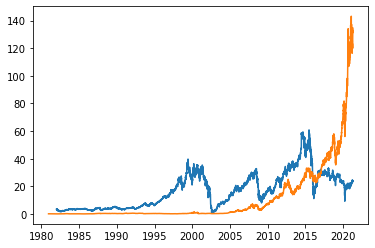

In [301]:
plt.plot(stock[stock['ticker']=='WMB']['Close'])
plt.plot(stock[stock['ticker']=='AAPL']['Close'])

In [303]:
aapl_wmb=stock[(stock['ticker']=='WMB')|(stock['ticker']=='AAPL')]

In [305]:
aapl_wmb.to_csv('./stock_price/aapl_wmb.csv')